#### Reading the wind speed file.

In [1]:
# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Nicer plots.

import seaborn as sns

# Machine learning.
import keras as kr

In [2]:
import numpy as np

# Limiting to .3 decimal points.
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

# Setting windspeedFile
windspeedFile = "Windspeed.txt"
# Reading windspeedFile, skipping headings
windspeed = np.loadtxt(windspeedFile, delimiter=",", skiprows=1)

# print(windspeed)

In [3]:
# Load data.
# info here: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
# http://www.smartcomputerlab.org/m6/Lab1.regression.tf.keras.pdf

# Need to use Polynomial linear regression
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np



def dataset(show=True):
    X = np.arange(-25, 25, 0.1)
    # Try changing y to a different function
    y = X**3 + 20 + np.random.randn(500)*1000
    if show:        
        plt.scatter(X, y)
        plt.show()
    return X, y



# split into input (X) and output (y) variables

#x, y = dataset(show=False)
dataset = np.loadtxt(windspeedFile, delimiter=",", skiprows=1)
x = dataset[:,0]
y = dataset[:,1]

#print(x)
X_scaled = x/max(x)
#print(x_scaled)
y_scaled = y/max(y)

polyDegree = 4
numEpochs = 50

In [4]:

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=polyDegree)

X_2 = poly.fit_transform(X_scaled.reshape(-1,1))
print(X_2.shape)
print(X_2[0])


(485, 5)
[1.000 0.013 0.000 0.000 0.000]


In [5]:
from keras.models import Sequential
from keras.layers import Dense

thisShape = polyDegree+1

model = Sequential()
model.add(Dense(64, input_dim=thisShape, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(thisShape, activation='relu'))
#= tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[(polyDegree+1)])])



In [6]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss='mean_squared_error')
#tf_history = model.fit(X_scaled, y_scaled, epochs=10, verbose=True)
tf_history = model.fit(X_2, y_scaled, epochs=numEpochs, verbose=True)

Epoch 1/50
16/16 [==============================] - 0s 875us/step - loss: 0.2616
Epoch 2/50
16/16 [==============================] - 0s 812us/step - loss: 0.1487
Epoch 3/50
16/16 [==============================] - 0s 750us/step - loss: 0.1042
Epoch 4/50
16/16 [==============================] - 0s 750us/step - loss: 0.0933
Epoch 5/50
16/16 [==============================] - 0s 812us/step - loss: 0.0859
Epoch 6/50
16/16 [==============================] - 0s 750us/step - loss: 0.0823
Epoch 7/50
16/16 [==============================] - 0s 812us/step - loss: 0.0799
Epoch 8/50
16/16 [==============================] - 0s 812us/step - loss: 0.0786
Epoch 9/50
16/16 [==============================] - 0s 812us/step - loss: 0.0767
Epoch 10/50
16/16 [==============================] - 0s 688us/step - loss: 0.0753
Epoch 11/50
16/16 [==============================] - 0s 750us/step - loss: 0.0745
Epoch 12/50
16/16 [==============================] - 0s 813us/step - loss: 0.0737
Epoch 13/50
16/16 [======

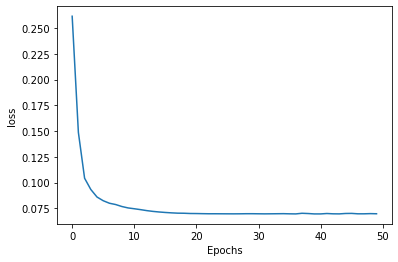

In [7]:
plt.plot(tf_history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

In [8]:
mse = tf_history.history['loss'][-1]
y_hat = model.predict(X_2)
print(y_hat)

[[0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000]
 ...
 [0.872 0.000 0.880 0.874 0.872]
 [0.872 0.000 0.880 0.874 0.872]
 [0.872 0.000 0.881 0.874 0.872]]


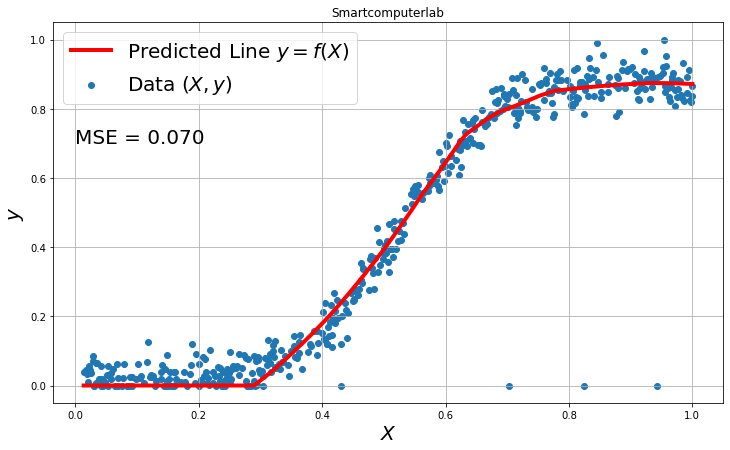

In [9]:
plt.figure(figsize=(12,7))
plt.title('Smartcomputerlab')
plt.scatter(X_2[:,1], y_scaled, label='Data $(X, y)$')
plt.plot(X_2[:,1], y_hat[:,4], color='red', label='Predicted Line $y = f(X)$',linewidth=4.0)
plt.xlabel('$X$', fontsize=20)
plt.ylabel('$y$', fontsize=20)
plt.text(0,0.70,'MSE = {:.3f}'.format(mse), fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()

In [10]:
# make class predictions with the model
# summarize the first 5 cases

for i in range(len(X_2)):
    print('%f => %f (expected %f)' % (X_2[i][1]*max(x), y_hat[i][4]*max(y), y_scaled[i]*max(y)))
    #print('%f => %f (expected %f)' % (X_2[i][1], y_hat[i][3], y_scaled[i]))

0.325000 => 0.000000 (expected 4.331000)
0.400000 => 0.000000 (expected 5.186000)
0.450000 => 0.000000 (expected 3.826000)
0.501000 => 0.000000 (expected 1.048000)
0.526000 => 0.000000 (expected 5.553000)
0.551000 => 0.000000 (expected 6.498000)
0.576000 => 0.000000 (expected 5.241000)
0.626000 => 0.000000 (expected 4.220000)
0.676000 => 0.000000 (expected 7.974000)
0.701000 => 0.000000 (expected 9.746000)
0.726000 => 0.000000 (expected 0.000000)
0.751000 => 0.000000 (expected 0.000000)
0.801000 => 0.000000 (expected 7.271000)
0.826000 => 0.000000 (expected 0.795000)
0.851000 => 0.000000 (expected 7.350000)
0.926000 => 0.000000 (expected 1.996000)
0.951000 => 0.000000 (expected 1.609000)
0.976000 => 0.000000 (expected 2.064000)
1.001000 => 0.000000 (expected 6.511000)
1.026000 => 0.000000 (expected 0.000000)
1.051000 => 0.000000 (expected 2.085000)
1.076000 => 0.000000 (expected 0.000000)
1.101000 => 0.000000 (expected 0.121000)
1.151000 => 0.000000 (expected 1.208000)
1.251000 => 0.00